In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
# the goal of this project is to find out if the new web page will improve the membership registration.
# the hypothesis is that the new designed page will convert more regular users to memnership program.

# the plan is to randomly separate all the regular users into two groups with similar sample characteristics
# such as age or gender. Then one group will use the old page as a control version and the other group will
# use the new page as a test version. 

# key factor for evaluation is number of users that converted to membership, if there is a significant different
# for the number of users that converted as using the old and new page. then we can decide if we need to
# change the web_page

In [3]:
data = pd.read_csv('ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
control_size = len(data[data['group']=='control'])
print(control_size)
treatment_size = len(data[data['group']=='treatment'])
print(treatment_size)

percentage_converted_old_page = data[data['group']=='control']['converted'].mean()
print(percentage_converted_old_page)

percentage_converted_new_page = data[data['group']=='treatment']['converted'].mean()
print(percentage_converted_new_page)

stats.ttest_ind(data[data.group=='control'].converted, data[data.group=='treatment'].converted)

# From the t_test the t_value is not big and the p_value is much higher than the threshold 0.05, so it 
# indicating that there is no clear different between using new and old page for attacting more users 
# become members

147202
147276
0.12039917935897611
0.11891957956489856


Ttest_indResult(statistic=1.2369207675839395, pvalue=0.21611748562490837)

In [46]:
# some secondary factor may worth for further investing, the time may be sensitive since it may take
# longer time to convert a regular user to membership than expected, but it does not mean new page does
# not work better than old page

import datetime as dt

data['timestamp'] = data['timestamp'].apply(lambda x : pd.to_datetime(str(x)))
data['date'] =  data['timestamp'].dt.date
# data.head()

y1 = data[data.group=='control'].groupby('date')['converted'].mean()
y2 = data[data.group=='treatment'].groupby('date')['converted'].mean()


(array([736330., 736334., 736338., 736342., 736346., 736350., 736354.]),
 <a list of 7 Text xticklabel objects>)

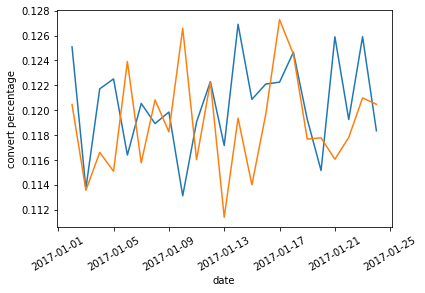

In [59]:
plt.plot(y1)
plt.plot(y2)

plt.xlabel('date')
plt.ylabel('convert percentage')
plt.xticks(rotation = 30)

# after study the time effect on the new page and old page, it seems that over a period time both 
# new and old page perform very similar, so there is no need for swich to the new page design